In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
#Reading in Metadata
df =  pd.read_csv("/Users/MattNwerem/Downloads/COVID_Kaggle_CORD-19/metadata.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Just peeking to see what I get with value_counts()
df["abstract"].value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
df.head(5)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [5]:
df["abstract"][0] #test

'OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%) were 

In [6]:
df["abstract"][1] #test

'Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lun

In [7]:
#Getting data types, might need to manipulate types later on
df.dtypes

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id           float64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [8]:
new_dtypes = {"title": str, "abstract": str} #these dtypes must be changed in order to use sent_tokenize()
df = df.astype(new_dtypes)

In [9]:
#Time to tokenize each sentence and work in the abstract metadata

sentences = []
words = []

for s in df['abstract']:
  replace = s.replace("[^a-zA-Z]", " ")
  clean_sentence = replace.lower()
  sentences.append(sent_tokenize(clean_sentence))

In [10]:
#puts all the sentences in a list --> no longer necessary but can be useful to maniputlate later
sentences = [y for x in sentences for y in x] ## literally all text from all articles

In [11]:
#Tokenizing words
for s in df['abstract']:
    replace = s.replace("[^a-zA-Z]", " ")
    clean_sentence = replace.lower()
    words.append(word_tokenize(clean_sentence))

In [12]:
len(df['abstract'])

158947

In [13]:
len(words)

158947

In [14]:
#Filtering out stopwords
stop_words = set(stopwords.words("english"))
newStopWords = [',','.','(',')','%',':',';','p','=']
stop_words.update(newStopWords)

non_filtered_words = []

stop_words  = list(stop_words) 
print("Stop Words: ", stop_words)
print()
print()
print()


for w in words:
    if w in stop_words:
        continue
    else:
        non_filtered_words.append(w)

filtered_words = []

for part in non_filtered_words:
    for words in part:
        if words not in stop_words:
            filtered_words.append(words)
print("Filtered Word Length:",len(filtered_words))

Stop Words:  ['myself', 'i', "it's", 'for', 'and', 'very', 'during', 'how', 'isn', 'your', 'who', 'until', 'above', 'd', 'has', 'hasn', "hasn't", 'was', 'yourself', 'of', 'nor', "you're", 'couldn', 'than', 'won', 'other', "didn't", 'you', 'now', "don't", "shouldn't", 'been', "you've", "you'd", 'over', "couldn't", 'my', 'its', 'ma', 'when', 'not', 'in', 'she', "mightn't", ':', 'p', 'me', 'hadn', "you'll", 'needn', 'yourselves', 'doesn', 'herself', 'we', 'his', "isn't", 'weren', 'the', 'few', 'he', 'if', 'or', 'through', 's', 'haven', ',', 'an', 'him', 'y', 'out', 'why', 'each', "weren't", "mustn't", 'same', ';', 'itself', 'further', 'that', 'about', 'll', 'they', 'more', "needn't", 'these', 'into', ')', "should've", 'o', 'here', 'only', 've', "haven't", 'whom', 'some', 'himself', "aren't", 'ourselves', 'by', 'below', 'themselves', 'because', 'it', 'wasn', 'where', 'do', 'again', 'did', "wouldn't", 'yours', 'at', 'own', 'there', 'from', 'down', 'against', 'those', 'most', 'does', 'before

In [15]:
print(filtered_words[:500]) # first 500 words

['objective', 'retrospective', 'chart', 'review', 'describes', 'epidemiology', 'clinical', 'features', '40', 'patients', 'culture-proven', 'mycoplasma', 'pneumoniae', 'infections', 'king', 'abdulaziz', 'university', 'hospital', 'jeddah', 'saudi', 'arabia', 'methods', 'patients', 'positive', 'm.', 'pneumoniae', 'cultures', 'respiratory', 'specimens', 'january', '1997', 'december', '1998', 'identified', 'microbiology', 'records', 'charts', 'patients', 'reviewed', 'results', '40', 'patients', 'identified', '33', '82.5', 'required', 'admission', 'infections', '92.5', 'community-acquired', 'infection', 'affected', 'age', 'groups', 'common', 'infants', '32.5', 'pre-school', 'children', '22.5', 'occurred', 'year-round', 'common', 'fall', '35', 'spring', '30', 'three-quarters', 'patients', '77.5', 'comorbidities', 'twenty-four', 'isolates', '60', 'associated', 'pneumonia', '14', '35', 'upper', 'respiratory', 'tract', 'infections', '2', '5', 'bronchiolitis', 'cough', '82.5', 'fever', '75', 'mal

In [16]:
#Not currently used; 
    # portstemmer allows me to take just the stem of each word for the word freq.
    # may use later, could be useful for phrases too

ps = PorterStemmer()
stemmed_words = []

#for words in filtered_words:
#    sample_w = ps.stem(words)
#    stemmed_words.append(sample_w)

In [17]:
def create_frequency_table(list1) -> dict:

    freqTable = dict()
    for word in list1:
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

In [18]:
freqTable = create_frequency_table(filtered_words)

In [19]:
freqTable

{'objective': 10298,
 'retrospective': 4490,
 'chart': 386,
 'review': 19579,
 'describes': 2034,
 'epidemiology': 3061,
 'clinical': 44703,
 'features': 6415,
 '40': 3480,
 'patients': 131641,
 'culture-proven': 8,
 'mycoplasma': 856,
 'pneumoniae': 1884,
 'infections': 22698,
 'king': 186,
 'abdulaziz': 22,
 'university': 2990,
 'hospital': 16439,
 'jeddah': 91,
 'saudi': 1143,
 'arabia': 930,
 'methods': 36538,
 'positive': 15850,
 'm.': 1779,
 'cultures': 1994,
 'respiratory': 48768,
 'specimens': 4714,
 'january': 5709,
 '1997': 268,
 'december': 4816,
 '1998': 274,
 'identified': 18131,
 'microbiology': 560,
 'records': 2025,
 'charts': 210,
 'reviewed': 4129,
 'results': 58843,
 '33': 1791,
 '82.5': 47,
 'required': 8377,
 'admission': 5051,
 '92.5': 53,
 'community-acquired': 899,
 'infection': 56463,
 'affected': 5884,
 'age': 16769,
 'groups': 15243,
 'common': 13873,
 'infants': 3978,
 '32.5': 83,
 'pre-school': 25,
 'children': 16223,
 '22.5': 94,
 'occurred': 6220,
 'year-

In [20]:
#Sorting frequency table in decsending order
sort_orders = sorted(freqTable.items(), key=lambda x: x[1], reverse=True)

In [21]:
#Top 5 from frquency table
sort_orders[:5]

[('patients', 131641),
 ('covid-19', 80271),
 ('virus', 62451),
 ('disease', 59064),
 ('results', 58843)]

In [22]:
#Get top 30 from freq table
top30counts = sort_orders[:30]

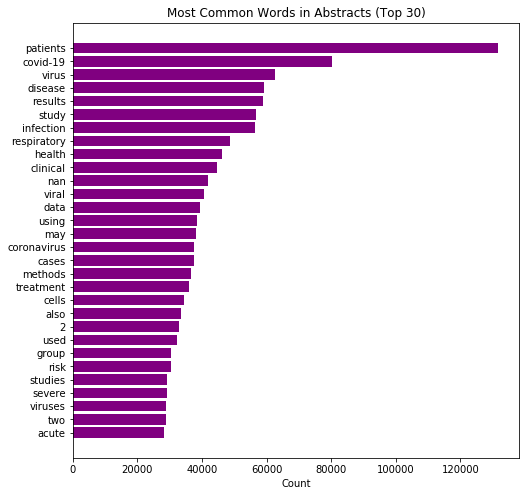

In [23]:
#Creating Plot for words in Abstracts

labels, values = zip(*top30counts)
fig, ax = plt.subplots(figsize=(8, 8))
ypos = np.arange(len(labels)) 
ax.barh(ypos, values,align = "center", color = "purple")


ax.set_yticks(ypos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most Common Words in Abstracts (Top 30)')
plt.show()

In [24]:
print(filtered_words[:25]) # first 500 words

['objective', 'retrospective', 'chart', 'review', 'describes', 'epidemiology', 'clinical', 'features', '40', 'patients', 'culture-proven', 'mycoplasma', 'pneumoniae', 'infections', 'king', 'abdulaziz', 'university', 'hospital', 'jeddah', 'saudi', 'arabia', 'methods', 'patients', 'positive', 'm.']


In [55]:
from nltk.util import trigrams, bigrams

In [44]:
#testing 3 word phrases

unigrams = word_tokenize("The quick brown fox jumps over the lazy dog")
tri_grams = list(trigrams(unigrams))
t_grams = trigrams(unigrams)
print(tri_grams)
tri_freqTable = create_frequency_table(tri_grams)
tri_freqTable

[('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]


{('The', 'quick', 'brown'): 1,
 ('quick', 'brown', 'fox'): 1,
 ('brown', 'fox', 'jumps'): 1,
 ('fox', 'jumps', 'over'): 1,
 ('jumps', 'over', 'the'): 1,
 ('over', 'the', 'lazy'): 1,
 ('the', 'lazy', 'dog'): 1}

In [46]:
three_w_phrases = list(trigrams(filtered_words))
three_w_freqTable = create_frequency_table(three_w_phrases)
three_w_freqTable

{('objective', 'retrospective', 'chart'): 1,
 ('retrospective', 'chart', 'review'): 178,
 ('chart', 'review', 'describes'): 1,
 ('review', 'describes', 'epidemiology'): 3,
 ('describes', 'epidemiology', 'clinical'): 2,
 ('epidemiology', 'clinical', 'features'): 49,
 ('clinical', 'features', '40'): 1,
 ('features', '40', 'patients'): 1,
 ('40', 'patients', 'culture-proven'): 1,
 ('patients', 'culture-proven', 'mycoplasma'): 1,
 ('culture-proven', 'mycoplasma', 'pneumoniae'): 1,
 ('mycoplasma', 'pneumoniae', 'infections'): 9,
 ('pneumoniae', 'infections', 'king'): 1,
 ('infections', 'king', 'abdulaziz'): 1,
 ('king', 'abdulaziz', 'university'): 4,
 ('abdulaziz', 'university', 'hospital'): 2,
 ('university', 'hospital', 'jeddah'): 1,
 ('hospital', 'jeddah', 'saudi'): 4,
 ('jeddah', 'saudi', 'arabia'): 24,
 ('saudi', 'arabia', 'methods'): 32,
 ('arabia', 'methods', 'patients'): 1,
 ('methods', 'patients', 'positive'): 3,
 ('patients', 'positive', 'm.'): 1,
 ('positive', 'm.', 'pneumoniae')

In [47]:
#Sorting frequency table in decsending order
three_w_sort_orders = sorted(three_w_freqTable.items(), key=lambda x: x[1], reverse=True)

In [50]:
#Get top 30 from freq table
three_w_top30counts = three_w_sort_orders[:30]

In [51]:
three_w_top30counts

[(('severe', 'acute', 'respiratory'), 10391),
 (('acute', 'respiratory', 'syndrome'), 9421),
 (('nan', 'nan', 'nan'), 9375),
 (('coronavirus', 'disease', '2019'), 6955),
 (('disease', '2019', 'covid-19'), 5982),
 (('respiratory', 'syndrome', 'coronavirus'), 5921),
 (('syndrome', 'coronavirus', '2'), 3297),
 (('respiratory', 'syndrome', 'sars'), 3157),
 (('polymerase', 'chain', 'reaction'), 2718),
 (('95', 'confidence', 'interval'), 2637),
 (('coronavirus', '2', 'sars-cov-2'), 2603),
 (('intensive', 'care', 'unit'), 2577),
 (('middle', 'east', 'respiratory'), 2522),
 (('east', 'respiratory', 'syndrome'), 2405),
 (('world', 'health', 'organization'), 2370),
 (('respiratory', 'syncytial', 'virus'), 2291),
 (('respiratory', 'distress', 'syndrome'), 1990),
 (('acute', 'respiratory', 'distress'), 1886),
 (('coronavirus', 'disease', 'covid-19'), 1652),
 (('personal', 'protective', 'equipment'), 1565),
 (('see', 'text', ']'), 1536),
 (('respiratory', 'tract', 'infections'), 1523),
 (('suppleme

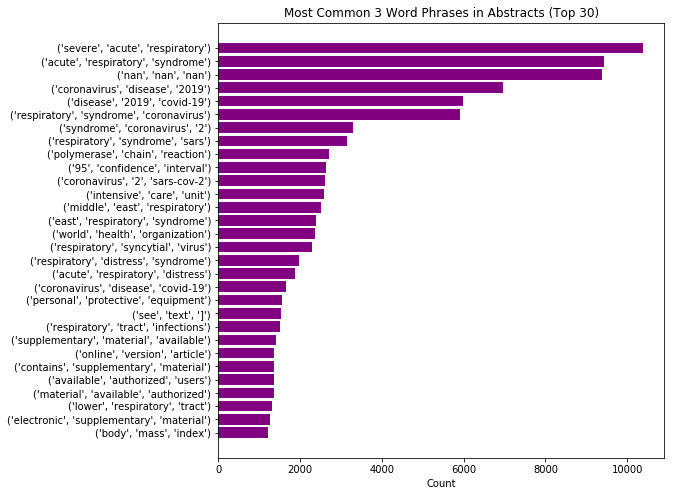

In [63]:
#Creating Plot for three words in Abstracts

labels, values = zip(*three_w_top30counts)
fig, ax = plt.subplots(figsize=(8, 8))
ypos = np.arange(len(labels)) 
ax.barh(ypos, values,align = "center", color = "purple")


ax.set_yticks(ypos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most Common 3 Word Phrases in Abstracts (Top 30)')
plt.show()

In [56]:
two_w_phrases = list(bigrams(filtered_words))
two_w_freqTable = create_frequency_table(two_w_phrases)
two_w_freqTable

{('objective', 'retrospective'): 15,
 ('retrospective', 'chart'): 197,
 ('chart', 'review'): 253,
 ('review', 'describes'): 178,
 ('describes', 'epidemiology'): 5,
 ('epidemiology', 'clinical'): 275,
 ('clinical', 'features'): 1311,
 ('features', '40'): 1,
 ('40', 'patients'): 213,
 ('patients', 'culture-proven'): 1,
 ('culture-proven', 'mycoplasma'): 1,
 ('mycoplasma', 'pneumoniae'): 399,
 ('pneumoniae', 'infections'): 38,
 ('infections', 'king'): 1,
 ('king', 'abdulaziz'): 19,
 ('abdulaziz', 'university'): 6,
 ('university', 'hospital'): 684,
 ('hospital', 'jeddah'): 6,
 ('jeddah', 'saudi'): 24,
 ('saudi', 'arabia'): 927,
 ('arabia', 'methods'): 32,
 ('methods', 'patients'): 718,
 ('patients', 'positive'): 429,
 ('positive', 'm.'): 12,
 ('m.', 'pneumoniae'): 278,
 ('pneumoniae', 'cultures'): 1,
 ('cultures', 'respiratory'): 9,
 ('respiratory', 'specimens'): 390,
 ('specimens', 'january'): 2,
 ('january', '1997'): 9,
 ('1997', 'december'): 6,
 ('december', '1998'): 4,
 ('1998', 'ident

In [57]:
#Sorting frequency table in decsending order
two_w_sort_orders = sorted(two_w_freqTable.items(), key=lambda x: x[1], reverse=True)

In [58]:
#Get top 30 from freq table
two_w_top30counts = two_w_sort_orders[:30]

In [61]:
two_w_top30counts

[(('nan', 'nan'), 16888),
 (('acute', 'respiratory'), 14533),
 (('95', 'ci'), 13100),
 (('respiratory', 'syndrome'), 12617),
 (('public', 'health'), 11203),
 (('severe', 'acute'), 10570),
 (('coronavirus', 'disease'), 9427),
 (('covid-19', 'pandemic'), 9399),
 (('disease', '2019'), 7353),
 (('2019', 'covid-19'), 6264),
 (('syndrome', 'coronavirus'), 5966),
 (('<', '0.001'), 5817),
 (('novel', 'coronavirus'), 5776),
 (('covid-19', 'patients'), 5627),
 (('health', 'care'), 5468),
 (('infectious', 'diseases'), 5151),
 (('respiratory', 'tract'), 4915),
 (('intensive', 'care'), 4663),
 (('risk', 'factors'), 4408),
 (('influenza', 'virus'), 4290),
 (('infectious', 'disease'), 3776),
 (('patients', 'covid-19'), 3708),
 (('nan', 'background'), 3484),
 (('coronavirus', '2'), 3476),
 (('immune', 'response'), 3473),
 (('patients', 'underwent'), 3444),
 (('respiratory', 'viruses'), 3404),
 (('chain', 'reaction'), 3376),
 (('united', 'states'), 3366),
 (('<', '0.05'), 3328)]

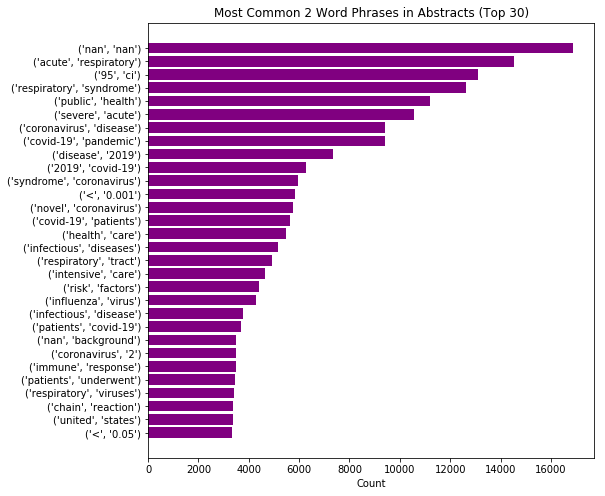

In [62]:
#Creating Plot for three words in Abstracts

labels, values = zip(*two_w_top30counts)
fig, ax = plt.subplots(figsize=(8, 8))
ypos = np.arange(len(labels)) 
ax.barh(ypos, values,align = "center", color = "purple")


ax.set_yticks(ypos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most Common 2 Word Phrases in Abstracts (Top 30)')
plt.show()